## AIM-5014-100
### By Zeyu Wang
### Fall 2021
### Visualization

# 1. Load data
I uploaded data to GitHub so can download them anywhere. The data is about every country's GDP from 1960-2016. There are four columns and they are Country Name, Country Code, year, and value separately.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/NewThread-ZY/AIM-5014-100/main/visualization/gdp_csv.csv')

In [3]:
data

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [4]:
data.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


# 2 Clean data.
Check if there are nan and null data in the dataset.

In [5]:
data.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [6]:
data.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

So nice that there isn't any nan or null data in this dataset.

# 3. Visuaization

1. change over time

Here I'd like to plot out the USA GDP change over time.

In [7]:
data_usa = data[data['Country Code'] == 'USA']

In [8]:
data_usa = data_usa.reset_index(drop = True)
data_usa.head()

,Country Name,Country Code,Year,Value
0,United States,USA,1960,5.433000e+11
1,United States,USA,1961,5.633000e+11
2,United States,USA,1962,6.051000e+11
3,United States,USA,1963,6.386000e+11
4,United States,USA,1964,6.858000e+11


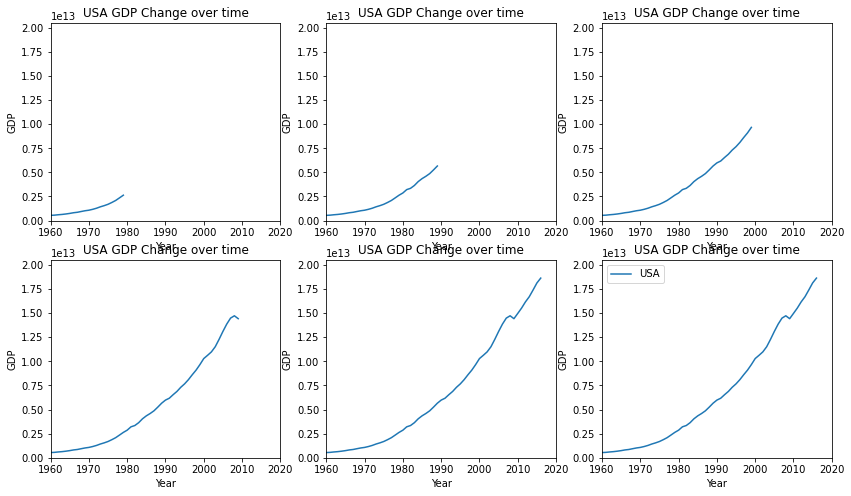

In [9]:
plt.figure(figsize = (14,8))
plt.subplot(2,3,1)
plt.plot(data_usa.Year[:20], data_usa.Value[:20], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.subplot(2,3,2)
plt.plot(data_usa.Year[:30], data_usa.Value[:30], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.subplot(2,3,3)
plt.plot(data_usa.Year[:40], data_usa.Value[:40], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.subplot(2,3,4)
plt.plot(data_usa.Year[:50], data_usa.Value[:50], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.subplot(2,3,5)
plt.plot(data_usa.Year[:60], data_usa.Value[:60], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.subplot(2,3,6)
plt.plot(data_usa.Year[:70], data_usa.Value[:70], label = 'USA')
plt.title('USA GDP Change over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xlim([data_usa.Year.min(), data_usa.Year.max()+4])
plt.ylim([0, data_usa.Value.max()*(1.1)])

plt.legend()
plt.show()

2. Zoom out

In [10]:
import seaborn as sns

In [11]:
data_usa_extract = data_usa[['Year', 'Value']]
data_usa_extract.head()

,Year,Value
0,1960,5.433000e+11
1,1961,5.633000e+11
2,1962,6.051000e+11
3,1963,6.386000e+11
4,1964,6.858000e+11


(13500000000000.0, 15500000000000.0)

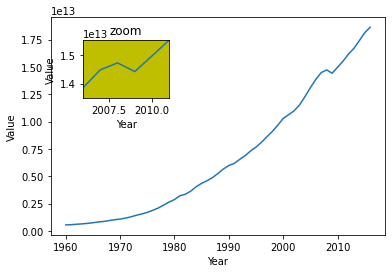

In [12]:
sns.lineplot(data=data_usa_extract, x="Year", y="Value")

ax2 = plt.axes([0.2, 0.6, 0.2, 0.2], facecolor='y')
sns.lineplot(data=data_usa_extract, x="Year", y="Value")
ax2.set_title('zoom')
ax2.set_xlim([2006,2011])
ax2.set_ylim([1.35e13,1.55e13])

3. outliers

select several countries' data and see their outliers

In [13]:
import altair as alt

In [14]:
data_area = data[(data['Country Code']=='USA') | (data['Country Code']=='CHN') | (data['Country Code']=='JPN') | (data['Country Code']=='KOR') | (data['Country Code']=='GBR') | (data['Country Code']=='IND') | (data['Country Code']=='MEX') | (data['Country Code']=='DEU') | (data['Country Code']=='MEX') | (data['Country Code']=='CAN') | (data['Country Code']=='FRA')]

In [15]:
alt.Chart(data_area).mark_boxplot(extent='min-max').encode(
    x='Country Code',
    y='Value'
)

alt.Chart(...)

4. intersections

See the GDP of China and Japan and when their GDP is an intersection.

In [16]:
from bokeh.plotting import figure, show

In [17]:
p = figure(title="GDP", x_axis_label='year', y_axis_label='value')

In [18]:
data_ch = data[data['Country Code']=='CHN']
data_jp = data[data['Country Code']=='JPN']

In [19]:
p.line(data_ch['Year'], data_ch['Value'], legend_label="China", line_color="blue", line_width=2)
p.line(data_jp['Year'], data_jp['Value'], legend_label="Japan", line_color="red", line_width=2)
show(p)

When you run the last line code, it'll open a new windows and show the result.

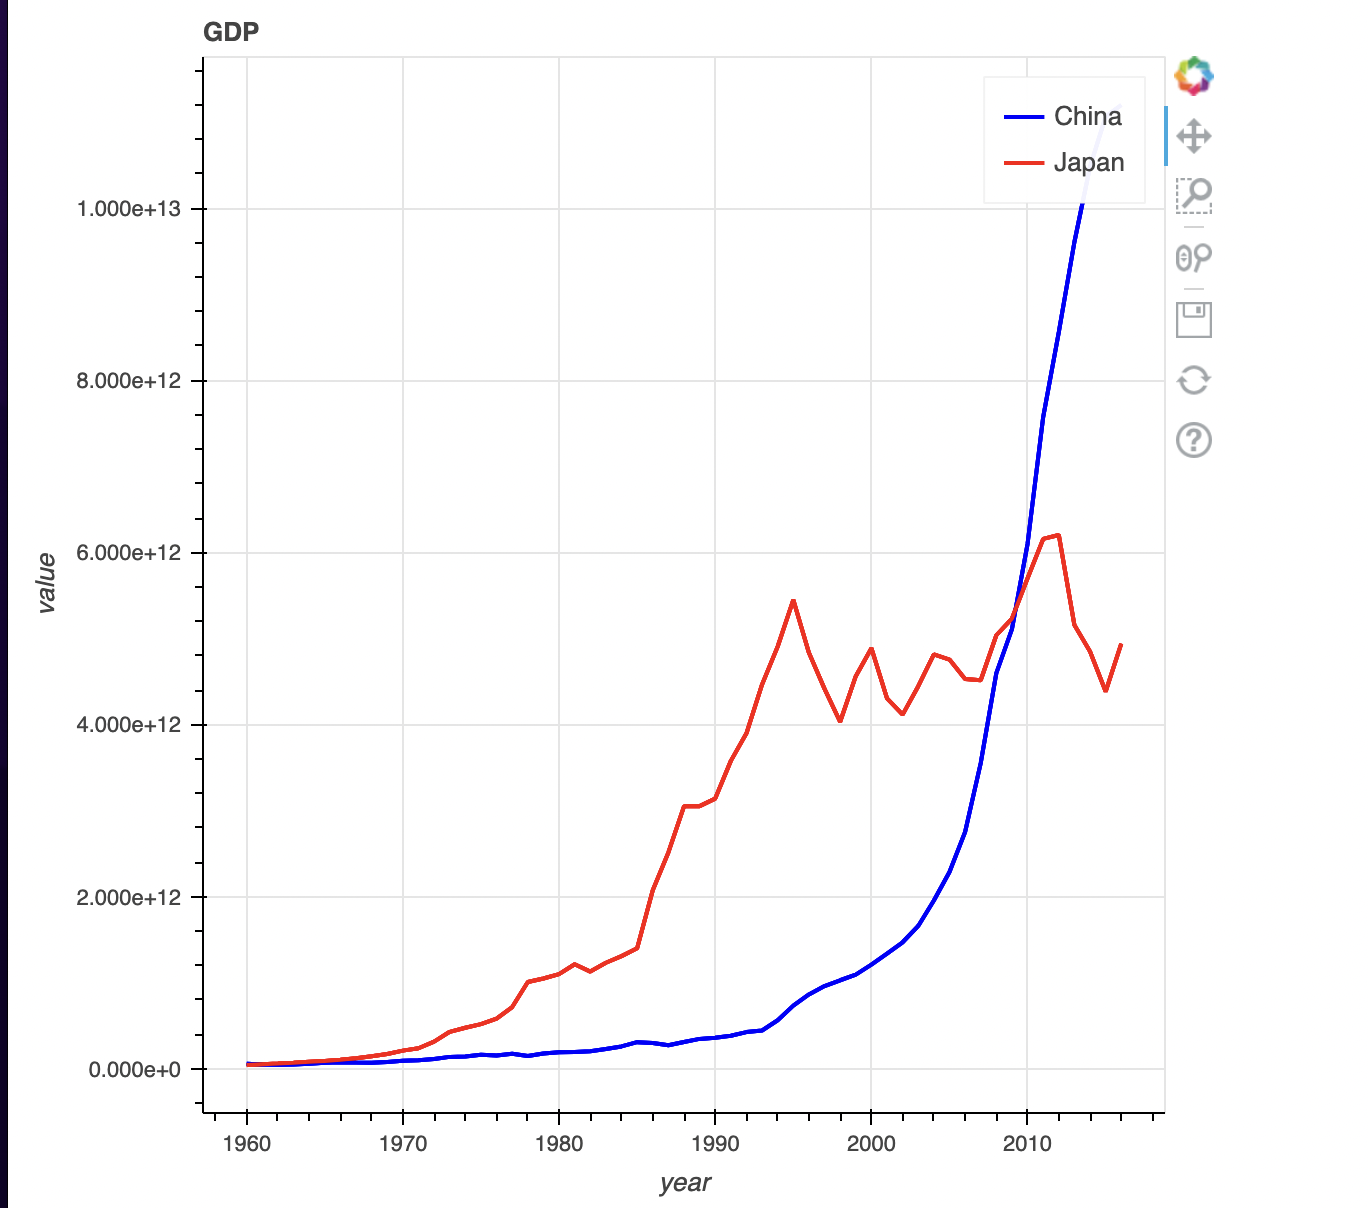